# 作业2 股票数据清洗

同学们好，本次作业的主要内容为使用pandas进行数据预处理。希望这两天你们已经从Python的课程内容中回过神来了。
没有数据的分析是无源之水，能够熟练处理数据是成为合格的数据分析师的基本要求，希望大家在今后多多实战，成为数据大师。

本次作业将使用公开标普500的股票数据。
https://www.kaggle.com/dgawlik/nyse#prices-split-adjusted.csv

作业的形式以问答为主，因为不涉及过长的代码，核心是数据的操作，所以这里没有太多的代码模板可供大家参考。
希望大家能从搜索引擎（google/bing）问答社区（stackoverflow）或者[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)或者我提供的jupyter notebooks 中找到回答问题需要的方法。
请时刻牢记数据的增删改查四种原子操作，思考我们的问题可以被如何分解。

那么首先，我们要import pandas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# 1. 从fundemantals.csv开始！

fundemantals.csv 是这些股票的年报数据

请用数据回答以下问题：

1. S&P500股票在2015年`net income`的均值是多少？最大值比最小值多多少？（每问10分，共计20分）
2. S&P500股票在2016年的固定资产（fixed assets）占总资产(total assets)比例的均值是多少？固定资产占总资产比例最小的股票是的代码（ticker symbol）是什么？（每问10分，共计20分）


1.1回答：2015年标普500的Net income的均值为1.575186e+09。最大值比最小值多出7.692200e+10。
1.2回答：标普500股票的固定资产除以总资产比率的均值为0.185578。并且该比率最小值为0.016905，对应股票DHI。

In [2]:
fundamentals_df=pd.read_csv('fundamentals.csv')



In [3]:
fundamentals_df.head()



,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [28]:
fundamentals_df.groupby(["For Year"])["Net Income"].mean()


For Year
1215.0    4.546000e+08
2012.0    1.579040e+09
2013.0    1.858240e+09
2014.0    1.818672e+09
2015.0    1.575186e+09
2016.0    2.083535e+09
Name: Net Income, dtype: float64

In [27]:
fundamentals_df.groupby(["For Year"])["Net Income"].agg([np.mean,np.min,np.max])



,mean,amin,amax
For Year,,,
1215.0,4.546000e+08,4.546000e+08,4.546000e+08
2012.0,1.579040e+09,-4.068000e+09,4.488000e+10
2013.0,1.858240e+09,-2.534000e+09,3.703700e+10
2014.0,1.818672e+09,-5.060000e+09,3.951000e+10
2015.0,1.575186e+09,-2.352800e+10,5.339400e+10
2016.0,2.083535e+09,-6.770000e+08,4.568700e+10


In [14]:
fundamentals_df.groupby(["For Year"])["Net Income"].max()-fundamentals_df.groupby(["For Year"])["Net Income"].min() 


For Year
1215.0    0.000000e+00
2012.0    4.894800e+10
2013.0    3.957100e+10
2014.0    4.457000e+10
2015.0    7.692200e+10
2016.0    4.636400e+10
Name: Net Income, dtype: float64

In [43]:
fundamentals_df.groupby(["For Year"])["Net Income"].agg(lambda x:x.max()-x.min()) #第一题的第一问结束


For Year
1215.0    0.000000e+00
2012.0    4.894800e+10
2013.0    3.957100e+10
2014.0    4.457000e+10
2015.0    7.692200e+10
2016.0    4.636400e+10
Name: Net Income, dtype: float64

In [68]:
fundamentals01_df=fundamentals_df.filter(items=["For Year","Ticker Symbol","Fixed Assets","Total Assets"]) #临时设置一个列表，方便进行计算


In [71]:
fundamentals01_df.head(n=15)



,For Year,Ticker Symbol,Fixed Assets,Total Assets
0,2012.0,AAL,1.340200e+10,2.351000e+10
1,2013.0,AAL,1.925900e+10,4.227800e+10
2,2014.0,AAL,2.308400e+10,4.322500e+10
3,2015.0,AAL,2.751000e+10,4.841500e+10
4,2012.0,AAP,1.292547e+09,4.613814e+09
5,2013.0,AAP,1.286034e+09,5.564774e+09
6,2014.0,AAP,1.432030e+09,7.962358e+09
7,2015.0,AAP,1.434577e+09,8.134565e+09
8,2013.0,AAPL,1.659700e+10,2.070000e+11
9,2014.0,AAPL,2.062400e+10,2.318390e+11


In [73]:
fundamentals01_df["Fixed/Total"]=fundamentals01_df["Fixed Assets"]/fundamentals01_df["Total Assets"]


In [74]:
fundamentals01_df.head()



,For Year,Ticker Symbol,Fixed Assets,Total Assets,Fixed/Total
0,2012.0,AAL,1.340200e+10,2.351000e+10,0.570055
1,2013.0,AAL,1.925900e+10,4.227800e+10,0.455532
2,2014.0,AAL,2.308400e+10,4.322500e+10,0.534043
3,2015.0,AAL,2.751000e+10,4.841500e+10,0.568212
4,2012.0,AAP,1.292547e+09,4.613814e+09,0.280147


In [75]:
fundamentals01_df.groupby(["For Year"])["Fixed/Total"].agg([np.mean,np.min,np.max])


,mean,amin,amax
For Year,,,
1215.0,0.045069,0.045069,0.045069
2012.0,0.328518,0.000000,0.977524
2013.0,0.286062,0.000000,0.963156
2014.0,0.285970,0.000000,0.981521
2015.0,0.284812,0.000000,0.980837
2016.0,0.185578,0.016905,0.753033


In [89]:
fundamentals02_df=fundamentals01_df.query('`For Year`==2016.0')  #借鉴了王圣博的作业，但是这里的反单引号`真的没见过😂
fundamentals02_df.head()



,For Year,Ticker Symbol,Fixed Assets,Total Assets,Fixed/Total
11,2016.0,AAPL,2.701000e+10,3.216860e+11,0.083964
19,2016.0,ABC,1.530682e+09,3.365620e+10,0.045480
31,2016.0,ADI,6.361160e+08,7.970278e+09,0.079811
43,2016.0,ADSK,1.693000e+08,5.515300e+09,0.030696
99,2016.0,AMAT,9.370000e+08,1.458800e+10,0.064231


In [90]:
fundamentals02_df.groupby(["Fixed/Total"])["Ticker Symbol"].min().iat[0]    #这一步真的很奇怪，有没有什么好用的办法呀？



'DHI'

# 2. 加入securities.csv~

securities.csv包含了这些股票的基本信息

1. 请列举出各个sector中的加入时间最早的股票名称（10分）
2. 请列举出每一个州中加入时间最晚的股票名称（10分）


2-1回答：结果见后
2-2回答：结果见后

In [168]:
securities_df=pd.read_csv('securities.csv')
securities_df.rename(columns={"Ticker symbol":"Ticker Symbol"},inplace=True)         #为了第三题的处理，需要将这里的股票代码变量名修改一致
securities_df.head()

,Ticker Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [169]:
securities_df.dtypes    



Ticker Symbol              object
Security                   object
SEC filings                object
GICS Sector                object
GICS Sub Industry          object
Address of Headquarters    object
Date first added           object
CIK                         int64
dtype: object

In [170]:
type(securities_df["Date first added"][1])             #日期为字符串形式



str

In [171]:
securities_df["Date"]=pd.to_datetime(securities_df["Date first added"])   #新增一列，使用pandas中的to_datetime函数进行操作，因字符串形式无法比较大小

In [172]:
securities_df.head()



,Ticker Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,Date
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,NaT
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1964-03-31
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2012-12-31
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,2011-07-06
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877,2015-08-31


In [173]:
securities_df.dropna()      #删除空值，查看问题，知道对于结果无影响



,Ticker Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,Date
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1964-03-31
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2012-12-31
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,2011-07-06
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877,2015-08-31
5,AYI,Acuity Brands Inc,reports,Industrials,Electrical Components & Equipment,"Atlanta, Georgia",2016-05-03,1144215,2016-05-03
...,...,...,...,...,...,...,...,...,...
492,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536,2016-01-05
494,WYNN,Wynn Resorts Ltd,reports,Consumer Discretionary,Casinos & Gaming,"Las Vegas, Nevada",2008-11-14,1174922,2008-11-14
499,XYL,Xylem Inc.,reports,Industrials,Industrial Conglomerates,"White Plains, New York",2011-11-01,1524472,2011-11-01
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997-10-06


In [174]:
securities01_df=securities_df.filter(items=["Ticker Symbol","GICS Sector","Address of Headquarters","Date"])
securities01_df.dropna()
securities01_df.head()



,Ticker Symbol,GICS Sector,Address of Headquarters,Date
0,MMM,Industrials,"St. Paul, Minnesota",NaT
1,ABT,Health Care,"North Chicago, Illinois",1964-03-31
2,ABBV,Health Care,"North Chicago, Illinois",2012-12-31
3,ACN,Information Technology,"Dublin, Ireland",2011-07-06
4,ATVI,Information Technology,"Santa Monica, California",2015-08-31


In [175]:
securities01_df.groupby(["GICS Sector"])["Date"].min()          #这样是找到不同行业分类中的股票最早上市时间，但是还是没法返回对应的股票代码


GICS Sector
Consumer Discretionary        1970-06-30
Consumer Staples              1969-03-31
Energy                        1965-03-31
Financials                    1975-06-30
Health Care                   1964-03-31
Industrials                   1964-03-31
Information Technology        1974-12-31
Materials                     1964-06-30
Real Estate                   2007-01-10
Telecommunications Services   1983-11-30
Utilities                     1976-06-30
Name: Date, dtype: datetime64[ns]

In [189]:
id=securities01_df.groupby(["GICS Sector"])["Date"].transform(min)



In [193]:
securities01_df.groupby("GICS Sector").apply(lambda t: t[t.Date==t.Date.min()])    #第一问答案在这里，这样才可以得到想要的信息



Ticker Symbol                  GICS Sector  \
GICS Sector                                                                  
Consumer Discretionary      296           MCD       Consumer Discretionary   
Consumer Staples            207           GIS             Consumer Staples   
                            433           CLX             Consumer Staples   
Energy                      399           SLB                       Energy   
Financials                  255           JPM                   Financials   
Health Care                 1             ABT                  Health Care   
Industrials                 48           ARNC                  Industrials   
                            230           HON                  Industrials   
Information Technology      233           HPQ       Information Technology   
Materials                   404           SHW                    Materials   
Real Estate                 56            AVB                  Real Estate   
Telecommunications Services 51              T  Telecommunications Services   
                            472            VZ  Telecommunications Services   
Utilities                   152           DUK                    Utilities   
                            328           NEE                    Utilities   

                                             Address of Headquarters  \
GICS Sector                                                            
Consumer Discretionary      296                  Oak Brook, Illinois   
Consumer Staples            207             Golden Valley, Minnesota   
                            433                  Oakland, California   
Energy                      399  Curaçao, Kingdom of the Netherlands   
Financials                  255                   New York, New York   
Health Care                 1                North Chicago, Illinois   
Industrials                 48                    New York, New York   
                            230               Morristown, New Jersey   
Information Technology      233                Palo Alto, California   
Materials                   404                      Cleveland, Ohio   
Real Estate                 56                Arlington, Virginia[3]   
Telecommunications Services 51                         Dallas, Texas   
                            472                   New York, New York   
Utilities                   152            Charlotte, North Carolina   
                            328                  Juno Beach, Florida   

                                      Date  
GICS Sector                                 
Consumer Discretionary      296 1970-06-30  
Consumer Staples            207 1969-03-31  
                            433 1969-03-31  
Energy                      399 1965-03-31  
Financials                  255 1975-06-30  
Health Care                 1   1964-03-31  
Industrials                 48  1964-03-31  
                            230 1964-03-31  
Information Technology      233 1974-12-31  
Materials                   404 1964-06-30  
Real Estate                 56  2007-01-10  
Telecommunications Services 51  1983-11-30  
                            472 1983-11-30  
Utilities                   152 1976-06-30  
                            328 1976-06-30

In [162]:
print(securities01_df.groupby(["Address of Headquarters"])["Date"].max()) #这样可以找到不同地区的股票最晚上市时间，但是也没有办法返回对应的股票代码；且未返回州而是地区

Address of Headquarters
Akron, Ohio                       NaT
Allentown, Pennsylvania    1985-04-30
Amsterdam, Netherlands            NaT
Amsterdam, New York        2013-12-23
Arlington, Virginia               NaT
                              ...    
Woburn, Massachusetts      2015-03-12
Woonsocket, Rhode Island          NaT
Worsley, UK                2012-10-01
York, Pennsylvania         2008-11-14
Zurich, Switzerland        2010-07-15
Name: Date, Length: 264, dtype: datetime64[ns]


In [199]:
securities01_df.groupby(["Address of Headquarters"]).apply(lambda x: x[x.Date==x.Date.max()])     #第二问答案在此，可见上市最晚股票，但是仍然是未处理州名（我不会！）

,,Ticker Symbol,GICS Sector,Address of Headquarters,Date
Address of Headquarters,,,,,
"Allentown, Pennsylvania",13,APD,Materials,"Allentown, Pennsylvania",1985-04-30
"Amsterdam, New York",308,MHK,Consumer Discretionary,"Amsterdam, New York",2013-12-23
"Arlington, Virginia[3]",56,AVB,Real Estate,"Arlington, Virginia[3]",2007-01-10
"Atlanta, Georgia",5,AYI,Industrials,"Atlanta, Georgia",2016-05-03
"Auburn Hills, Michigan",72,BWA,Consumer Discretionary,"Auburn Hills, Michigan",2011-12-19
...,...,...,...,...,...
"Winston-Salem, North Carolina",216,HBI,Consumer Discretionary,"Winston-Salem, North Carolina",2015-03-20
"Woburn, Massachusetts",407,SWKS,Information Technology,"Woburn, Massachusetts",2015-03-12
"Worsley, UK",350,PNR,Industrials,"Worsley, UK",2012-10-01


# 3. merge!

现在你需要同时处理来自两个表中的信息了

1. 请思考，合并两个表的信息的时候，我们应该用什么样的准则对其它们（10分）
2. 请列举每个sector在2013-2016年累计Research&Development的总投入（10分）
3. 请列举出每个sector中，在2013-2016年累计Research&development投入最大的3家公司的名称以及投入的数值（20分）

In [ ]:
3-1：合并时应该按照股票代码ticker symbol进行合并，具体见后面
3-2:见后面
3-3：见后面


In [49]:
fundamentals_df.shape   #查看数据量


(1781, 79)

In [50]:
securities_df.shape


(505, 8)

In [51]:
fundamentals_df.columns      #查看列名



Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [52]:
securities_df.columns\


Index(['Ticker symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub Industry', 'Address of Headquarters', 'Date first added',
       'CIK'],
      dtype='object')

In [176]:
df=pd.merge(fundamentals_df,securities_df,how="inner",on="Ticker Symbol")  
#原数据里面的Ticker Symbol中的S字母一个大写一个小写，坑！


In [177]:
df.head()


,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Earnings Per Share,Estimated Shares Outstanding,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,Date
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,-5.60,3.350000e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201,2015-03-23
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,-11.25,1.630222e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201,2015-03-23
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,4.02,7.169154e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201,2015-03-23
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,11.39,6.681299e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201,2015-03-23
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,5.29,7.328355e+07,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449,2015-07-09


In [180]:
type(df["For Year"][3])             #年份数字是浮点数


numpy.float64

In [182]:
df1316=df.query("2013.0<=`For Year`<=2016.0")
df1316.head()



,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Earnings Per Share,Estimated Shares Outstanding,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,Date
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,-11.25,1.630222e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201,2015-03-23
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,4.02,7.169154e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201,2015-03-23
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,11.39,6.681299e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201,2015-03-23
5,5,AAP,2013-12-28,2.609239e+09,-32428000.0,2.698000e+06,26.0,-1.957570e+08,5.312930e+08,40.0,...,5.36,7.308918e+07,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449,2015-07-09
6,6,AAP,2015-01-03,3.616038e+09,-48209000.0,3.092000e+06,25.0,-2.284460e+08,5.629450e+08,3.0,...,6.75,7.315926e+07,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449,2015-07-09


In [185]:
df1316.groupby(["GICS Sector"])["Research and Development"].sum()               #3-2即第二问的答案



GICS Sector
Consumer Discretionary         1.860178e+09
Consumer Staples               1.346700e+09
Energy                         1.692513e+09
Financials                     0.000000e+00
Health Care                    1.527224e+11
Industrials                    4.262290e+10
Information Technology         2.818233e+11
Materials                      1.850921e+10
Real Estate                    1.162100e+08
Telecommunications Services    0.000000e+00
Utilities                      0.000000e+00
Name: Research and Development, dtype: float64

In [187]:
df1316.groupby(["GICS Sector"])["Research and Development"].transform(max)



1       3.331000e+09
2       3.331000e+09
3       3.331000e+09
5       4.270430e+08
6       4.270430e+08
            ...     
1775    0.000000e+00
1776    0.000000e+00
1777    8.393000e+09
1778    8.393000e+09
1779    8.393000e+09
Name: Research and Development, Length: 1363, dtype: float64

In [234]:
df131601=df1316.filter(items=["GICS Sector","Ticker Symbol","Research and Development"])            #进行数据简化，提取出第三题只需要的数据。
df131601.head()



,GICS Sector,Ticker Symbol,Research and Development
1,Industrials,AAL,0.0
2,Industrials,AAL,0.0
3,Industrials,AAL,0.0
5,Consumer Discretionary,AAP,0.0
6,Consumer Discretionary,AAP,0.0


In [236]:
df131602=df131601.groupby(["GICS Sector","Ticker Symbol"])["Research and Development"].sum()  #3-3第三问的答案从这里开始
df131602.head()



GICS Sector             Ticker Symbol
Consumer Discretionary  AAP              0.0
                        AMZN             0.0
                        AN               0.0
                        AZO              0.0
                        BBBY             0.0
Name: Research and Development, dtype: float64

In [239]:
df131602.sort_values(ascending=False,inplace=True)        #每个行业中，对于公司的总研发费用进行倒序排列
df131602.head()



GICS Sector             Ticker Symbol
Information Technology  MSFT             4.582600e+10
                        INTC             3.427600e+10
                        AAPL             2.862800e+10
                        CSCO             2.473900e+10
Health Care             PFE              2.276100e+10
Name: Research and Development, dtype: float64

In [240]:
df131602.groupby(["GICS Sector"]).head(3)                               #这是3-3第三问的答案。



GICS Sector                  Ticker Symbol
Information Technology       MSFT             4.582600e+10
                             INTC             3.427600e+10
                             AAPL             2.862800e+10
Health Care                  PFE              2.276100e+10
                             MRK              2.138700e+10
                             LLY              1.506130e+10
Industrials                  BA               9.449000e+09
                             UTX              7.096000e+09
                             CAT              6.545000e+09
Materials                    MON              6.350000e+09
                             DD               5.893000e+09
Energy                       BHI              1.635000e+09
Materials                    PPG              1.422000e+09
Consumer Discretionary       GRMN             1.187087e+09
                             HAS              6.730910e+08
Consumer Staples             CLX              5.320000e+08
             

# 4. 现在让我们来看看更加复杂的数据

请导入price.csv，然后结合你的聪明才智回答以下问题（附加题，40分）

假设你是某基金公司的老板，现在对于每只股票，你都专门安排了一位负责它的交易员。公司规定每一位交易员手中的资金要么全部买入要么全部卖出（空仓，转化为现金）。假设2016年每一位交易员手中都有10000美元，假设他们都能够看到2016年全年的数据，假设他们都能抓住每一次机会，那么请问2016年底时，赚钱最多的股票是哪一只，赚了多少钱？

In [27]:
回答：赚的最多的是CHK    获利8616435.240507381


SyntaxError: invalid character in identifier (<ipython-input-27-e248d5d58cc8>, line 1)

In [28]:
prices_df=pd.read_csv('prices.csv')
prices_df


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [29]:
prices_df.dtypes     #时间是字符串形式



date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [30]:
prices_df["Date"]=pd.to_datetime(prices_df["date"])            #为了比较，将时间转换为时间格式，注意到时间都是0点0分，数据不属于高频数据，但可以假设高频交易易
prices_df


,date,symbol,open,close,low,high,volume,Date
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2016-01-05
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,2016-01-06
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,2016-01-07
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,2016-01-08
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,2016-01-11
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0,2016-01-12
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0,2016-01-13
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0,2016-01-14
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0,2016-01-15
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0,2016-01-19


In [31]:
prices_df["NI"]=(10000/prices_df["low"])*(prices_df["high"]-prices_df["low"])      #假设能抓住每一天中的最高价与最低价之差，每天都可以低买高卖获得可操作性的最大利润
prices_df


,date,symbol,open,close,low,high,volume,Date,NI
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2016-01-05,322.132456
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,2016-01-06,466.900026
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,2016-01-07,418.515444
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,2016-01-08,347.136740
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,2016-01-11,283.986862
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0,2016-01-12,136.244367
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0,2016-01-13,397.904269
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0,2016-01-14,452.521205
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0,2016-01-15,264.474540
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0,2016-01-19,546.099921


In [32]:
prices01_df=prices_df.groupby(["symbol"])["NI"].sum()
prices01_df



symbol
A       385380.891616
AAL     722903.221704
AAP     365451.582516
AAPL    345971.241641
ABBV    231390.522354
ABC     310573.685488
ABT     269858.365793
ACN     294084.803368
ADBE    369671.711711
ADI     361950.256413
ADM     337771.280383
ADP     257476.755920
ADS     389628.763711
ADSK    461294.706375
AEE     282214.384607
AEP     263110.183101
AES     424810.503608
AET     395191.316165
AFL     332696.656069
AGN     408527.339025
AIG     445565.123743
AIV     378462.153727
AIZ     326532.601245
AJG     254955.544029
AKAM    469336.269231
ALB     423307.528015
ALK     499665.378719
ALL     276582.012716
ALLE    158301.389755
ALXN    542806.026719
            ...      
VZ      253781.829435
WAT     324111.369001
WBA     349598.047033
WDC     545051.706426
WEC     267569.783568
WFC     335336.435685
WFM     406858.937421
WHR     477831.364162
WLTW     51270.127631
WM      241141.799285
WMB     526875.881727
WMT     231068.074959
WRK     124604.694861
WU      347112.561798
WY 

In [33]:
prices01_df.sort_values(ascending=False)


symbol
FSLR    761006.866976
CHK     757851.936248
AAL     722903.221704
MU      680610.469164
NFLX    672130.572964
URI     671207.272945
SWN     663464.456434
UAL     662894.633593
FCX     648675.249812
RRC     640581.557934
REGN    639736.383289
RIG     639502.140410
VRTX    628591.141311
NFX     622792.574371
PHM     622344.622717
TSO     620212.679780
DAL     609297.503161
SWKS    600440.893148
COG     598255.889557
LVLT    593497.129605
STX     590345.528859
XEC     584429.348138
CXO     583207.639953
ENDP    576428.506164
WYNN    574006.247174
HP      567599.362469
CF      567157.894866
GT      566345.097449
PXD     562840.203287
LEN     558891.665599
            ...      
FBHS    229832.144893
GIS     229572.538679
CL      229177.974947
K       227816.048500
SO      223549.992986
KMB     219215.830592
MCD     218589.017064
KO      218296.643402
PG      217054.057746
PEP     213797.344134
DLPH    209895.115120
NWSA    209248.619671
JNJ     208756.543177
ZTS     204138.247084
NWS

In [34]:
#这一题，我觉得获利最大的做法应该是：每一天将前一天商户余额现金，在一天中低价买入，高价卖出（这里假设低价先于高价出现），
#一天中实现最高价与最低价之间的利润，每一天的开始和结束都是以现金形式存储。
#如果不能确定最低价与最高价的出现次序，也可以获得开盘价和收盘价之间所有的正向利润


In [35]:
company=prices_df["symbol"].unique()
company                                #这里返回所有的公司列表


array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

600849    29.790001
601343    29.379999
601837    29.400000
602331    29.520000
602825    29.530001
603319    30.070000
603813    29.760000
604307    29.770000
604801    29.389999
605295    29.190001
605789    28.340000
606283    28.990000
606777    29.100000
607271    29.219999
607765    30.000000
608259    30.799999
608753    31.190001
609247    31.760000
609741    31.219999
610235    31.110001
610729    30.840000
611223    31.299999
611717    31.110001
612211    31.270000
612705    32.070000
613199    32.119999
613693    32.619999
614187    33.250000
614681    33.740002
615175    33.389999
            ...    
836684    32.830002
837184    33.490002
837684    33.720001
838184    33.840000
838684    34.000000
839184    34.990002
839684    34.480000
840184    34.049999
840684    34.189999
841184    34.680000
841684    35.049999
842184    34.849998
842684    35.270000
843184    35.230000
843684    36.279999
844184    36.540001
844684    36.450001
845184    36.130001
845684    35.970001


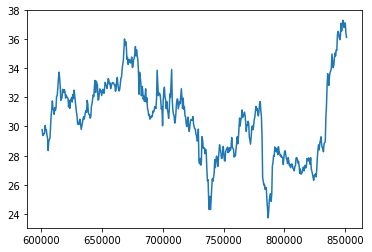

In [36]:
import matplotlib.pyplot as plt

def investigate_company(s):
    target_sequence=prices_df[prices_df['symbol']==s]['open']    #这就是我之前一直很奇怪的双重选择问题的答案😊
    print(target_sequence)
    plt.plot(target_sequence)
    plt.show()

investigate_company('SYF')



In [37]:
def investigate_company(s):
    tseq=prices_df[prices_df['symbol']==s][['date','open']]  
    tseq=tseq[tseq['date']>='2016-01-01']                       #选择出时间在2016之后的部分数据,这个很重要
    tseq.index=tseq['date']
    tseq=tseq.drop('date',axis=1)
    tseq=tseq.values.ravel().tolist()                                #ravel.tolist函数，将数值形成列表
    print(tseq)



In [38]:
def earn_money(price_seq):
    L=len(price_seq)
    money=10000
    for i in range(L-1):
        p=price_seq[i]
        next_p=price_seq[i+1]          #列表中指定序号用中括号，不可以小括号😂
        if next_p>p:
            money=money*(next_p/p)
    return money

def investigate_company(tseq):
   # tseq=prices_df[prices_df['symbol']==s][['date','open']]  
    tseq=tseq[tseq['date']>='2016-01-01']                       #选择出时间在2016之后的部分数据,这个很重要
    tseq.index=tseq['date']
    tseq=tseq.drop('date',axis=1)
    tseq=tseq.values.ravel().tolist()       #ravel.tolist函数，将数值形成列表
    money=earn_money(tseq)
    print(money)
    return money

#investigate_company('DOW')    

In [39]:
m=max(prices_df.groupby('symbol')[['date','open']].apply(investigate_company))       #这样没有最大值对应的公司名称，只有最大值，不够！

42747.86210140407
42747.86210140407
99792.60617869977
47238.04073441499
40445.47916431041
50079.09889872703
35009.648559415844
33722.28089206578
32097.9628776885
40789.9087015543
51151.07622651006
50473.95827735278
31658.583820257532
52928.53329513584
69603.76216520365
33238.14501051001
29563.812525674217
60827.312993401465
43885.13544789979
28373.800222530972
50510.59779543167
29734.607101148566
39852.42029258054
37358.1997962304
29768.711307159818
67367.17548013385
70962.59970108488
65415.78337993826
25722.687606235777
33130.445461814284
97723.27754684369
65780.66026543759
32087.908786012955
67508.64100062294
36316.93238153659
48039.859736926795
30936.62606120615
50562.384552712945
67083.37245022162
41489.814110417996
27552.08106923239
192262.00369027854
238357.88139545792
34201.01827249496
31118.056270830322
451495.99941061833
63756.22531216009
31670.77649565127
70342.57580359741
35682.25571625814
35536.3772515399
37556.17336878504
52817.24047981362
34687.356476062996
38196.31343868

54448.84751711591
33197.50285161663
28057.04551791549
40483.41387563576
94745.75494455118
43493.22863721977
28001.418090236053
33896.34653294001
35479.38621208456
191698.19191221683
31316.982228612498
38965.98531598508
46756.92697560299
52832.55692126723
33695.41167286588
25521.220569447443
415781.76131818903
30715.6070475755
107814.42074035757
40738.58486787434
47071.401347140956
41128.68846915975
167926.44176082392
135810.07394989254
30020.720381843286
35905.87235357328
42890.985906824346
33328.0515592682
39451.93530503335
41414.47608645671
36423.28000643738
55051.87153832442
34084.04519675464
33039.45057208222
85711.8040138199
40383.3367247541


In [ ]:
def earn_money(price_seq):
    L=len(price_seq)
    money=10000
    for i in range(L-1):
        p=price_seq[i]
        next_p=price_seq[i+1]          #列表中指定序号用中括号，不可以小括号😂
        if next_p>p:
            money=money*(next_p/p)
    return money

def investigate(s):
    tseq=prices_df[prices_df['symbol']==s][['date','open']]  
    tseq=tseq[tseq['date']>='2016-01-01']                       #选择出时间在2016之后的部分数据,这个很重要
    tseq.index=tseq['date']
    tseq=tseq.drop('date',axis=1)
    tseq=tseq.values.ravel().tolist()       #ravel.tolist函数，将数值形成列表
    money=earn_money(tseq)
    return money

for i in company:
    if investigate(i)==m:
        print(i)
    

CHK
